In [1]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, RobustScaler
# from sklearn.pipeline import make_pipeline
# from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import NearMiss
# from imblearn.metrics import classification_report_imbalanced
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
# from collections import Counter
# from sklearn.model_selection import KFold, StratifiedKFold
# import warnings
# warnings.filterwarnings("ignore")

# from sklearn.model_selection import StratifiedShuffleSplit


In [20]:
data1 = pd.read_csv('../raw_data/stock_data.csv')
data1.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,1980-12-12,0.09872593730688095,0.09915515669143314,0.09872593730688095,0.09872593730688095,469033600
3,1980-12-15,0.09357533603906631,0.09400455538338985,0.09357533603906631,0.09400455538338985,175884800
4,1980-12-16,0.08670715242624283,0.08713636627717627,0.08670715242624283,0.08713636627717627,105728000


In [13]:
data = pd.read_csv('../raw_data/stock_data.csv', skiprows=2)
data.head()

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,1980-12-12,0.098726,0.099155,0.098726,0.098726,469033600
1,1980-12-15,0.093575,0.094005,0.093575,0.094005,175884800
2,1980-12-16,0.086707,0.087136,0.086707,0.087136,105728000
3,1980-12-17,0.088853,0.089282,0.088853,0.088853,86441600
4,1980-12-18,0.091429,0.091858,0.091429,0.091429,73449600


In [14]:
data.columns

Index(['Date', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4',
       'Unnamed: 5'],
      dtype='object')

In [15]:
data.describe()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
count,11145.000000,11145.000000,11145.000000,11145.000000,1.114500e+04
mean,24.220942,24.460613,23.956210,24.201483,3.145416e+08
std,51.152845,51.640683,50.601992,51.099863,3.346516e+08
min,0.037773,0.038203,0.037773,0.038203,0.000000e+00
25%,0.243894,0.248478,0.238660,0.243894,1.104816e+08
50%,0.451589,0.458785,0.444392,0.451589,2.029496e+08
75%,18.545761,18.718928,18.455257,18.576474,3.950184e+08
max,258.735504,259.814335,257.347047,257.906429,7.421641e+09


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        11145 non-null  object 
 1   Unnamed: 1  11145 non-null  float64
 2   Unnamed: 2  11145 non-null  float64
 3   Unnamed: 3  11145 non-null  float64
 4   Unnamed: 4  11145 non-null  float64
 5   Unnamed: 5  11145 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 522.5+ KB


In [17]:
df = data.copy()

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        11145 non-null  object 
 1   Unnamed: 1  11145 non-null  float64
 2   Unnamed: 2  11145 non-null  float64
 3   Unnamed: 3  11145 non-null  float64
 4   Unnamed: 4  11145 non-null  float64
 5   Unnamed: 5  11145 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 522.5+ KB


In [21]:
# Rename columns properly
df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]


## convert data types

In [28]:
df["Date"] = pd.to_datetime(df["Date"], errors='coerce')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    11145 non-null  datetime64[ns]
 1   Close   11145 non-null  float64       
 2   High    11145 non-null  float64       
 3   Low     11145 non-null  float64       
 4   Open    11145 non-null  float64       
 5   Volume  11145 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 522.5 KB


In [32]:
len(df)

11145

In [36]:
num_invalid_dates = df["Date"].isna().sum()

num_valid_dates = df["Date"].notna().sum()

num_invalid_dates, num_valid_dates

(np.int64(0), np.int64(11145))

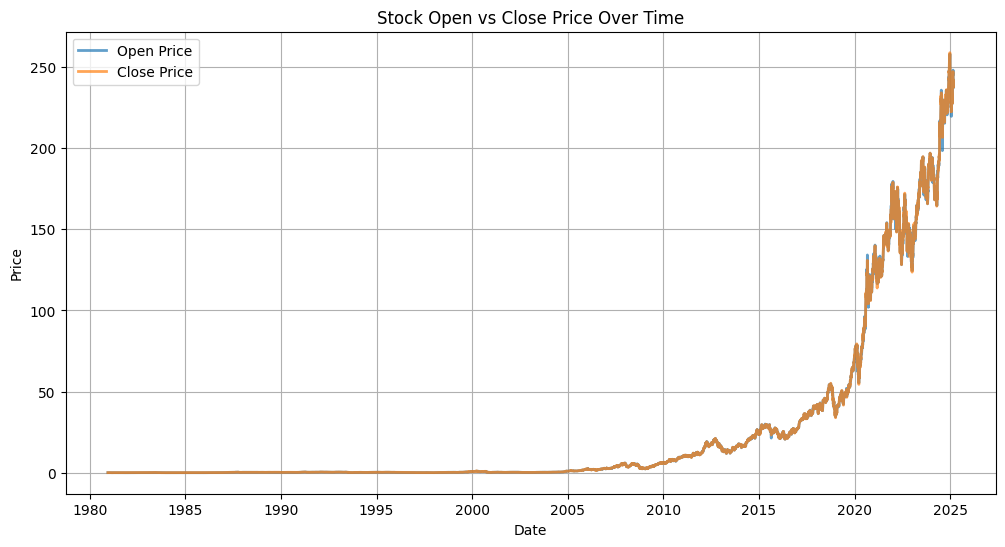

In [40]:
# Plot Open vs Close prices over time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Open"], label="Open Price", linewidth=2, alpha=0.7)
plt.plot(df["Date"], df["Close"], label="Close Price", linewidth=2, alpha=0.7)
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("Stock Open vs Close Price Over Time")
plt.legend()
plt.grid(True)
plt.show()
